<a href="https://colab.research.google.com/github/Aartizikre150/Datacamp/blob/main/Foundations_of_Inference_in_Python.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

Sampling and point estimates


In [ ]:
# Select a random starting row number, not including the last 90 rows
initial_row_number = np.random.choice(range(btc_sp_df.shape[0] - 90))

# Use initial_row_number to select the next 90 rows from that row number
sample_df = btc_sp_df.iloc[initial_row_number:(initial_row_number + 90)]

In [ ]:
# Use sample_df to compute the percent increase in Close_SP500
sp500_pct_change = (sample_df.iloc[0]['Close_SP500'] - sample_df.iloc[-1]['Close_SP500']) / sample_df.iloc[0]['Close_SP500']

# Use sample_df to compute the percent increase in Close_BTC
btc_pct_change = (sample_df.iloc[0]['Close_BTC'] - sample_df.iloc[-1]['Close_BTC']) / sample_df.iloc[0]['Close_BTC']

print('SP500: ', sp500_pct_change, '\n', 'BTC: ', btc_pct_change)

Repeated sampling, point estimates and inference

In [ ]:
# Write a for loop which repeats the sampling ten times
for i in range(10):
    # Select a random starting row number
    initial_row_number = np.random.choice(range(btc_sp_df.shape[0] - 90))
    # Select the next 90 rows after the starting row
    sample_df = btc_sp_df.iloc[initial_row_number:initial_row_number + 90]
    # Compute the percent change in closing price of BTC and print it
    btc_pct_change = (sample_df.iloc[0]['Close_BTC'] - sample_df.iloc[-1]['Close_BTC']) / sample_df.iloc[0]['Close_BTC']
    print(btc_pct_change)

In [ ]:
4

Visualizing samples

In [ ]:
# Plot a histogram of percent changes
plt.hist(btc_pct_change_list, bins=15, density=True)
# Set the x-axis label
plt.xlabel('BTC 90-day percent change')
# Set the y-axis label
plt.ylabel('Percent of samples')
# Set the title and show the graph
plt.title('Sampling distribution of BTC 90-day change')

plt.show()

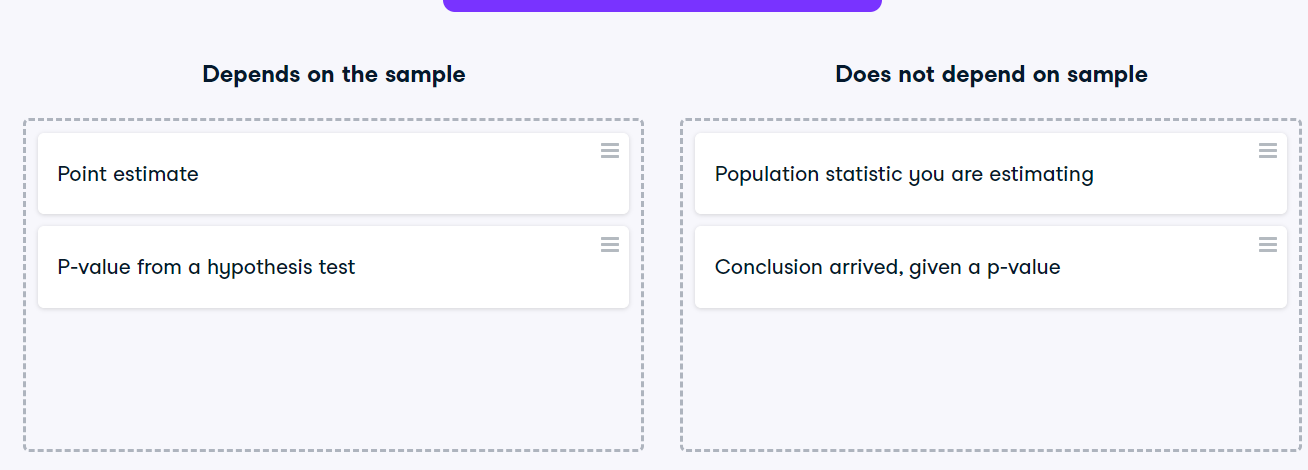

Normal sampling distributions

In [ ]:
# Define the number of samples to take and store the sample means
num_samples = 200
sample_means = []

# Write a for loop which repeats the sampling num_samples times
for i in range(num_samples):
  # Select 500 random Close_SP500 prices
  sp500_sample = np.random.choice(btc_sp_df['Close_SP500'], size=500)
  # Compute mean closing price and save it to sample_means
  sample_means.append(sp500_sample.mean())

plt.hist(sample_means)
plt.show()

Calculating confidence intervals

In [ ]:
# Select a sample of 500 random days
sample_closing = np.random.choice(btc_sp_df['Close_SP500'], size=500)

# Calculate the mean of the sample
sample_mean = sample_closing.mean()

# Calculate the standard error of the sample
sample_se = sample_closing.std() / np.sqrt(sample_closing.shape[0])

# Calculate a 95% confidence interval using this data
stats.norm.interval(alpha=0.95,
                   loc=sample_mean,
                   scale=sample_se)

Drawing conclusions from samples

In [ ]:
# Sample 1: Select a random sample of 500 rows
sample_df = btc_sp_df.sample(n=500)

# Compute a 95% confidence interval for the closing price of SP500
sample_ci = stats.norm.interval(alpha=0.95,
                                loc=sample_df['Close_SP500'].mean(),
                                scale=sample_df['Close_SP500'].std()/np.sqrt(500))

print(sample_ci)

In [ ]:
# Sample 2: Select the first 500 rows
first_500_df = btc_sp_df.iloc[:500]

# Compute a 95% confidence interval for the closing price of SP500
first_500_ci = stats.norm.interval(alpha=0.95,
	loc=first_500_df['Close_SP500'].mean(),
	scale=first_500_df['Close_SP500'].std()/np.sqrt(500))

print(first_500_ci)

In [ ]:
4

Testing for normality

In [ ]:
# Plot a histogram of the employees' "Years of Employment"
salary_df['Years of Employment'].plot(kind="hist")
plt.show()

# Conduct an Anderson-Darling test using the years of employment from salary_df
result = stats.anderson(salary_df['Years of Employment'])

# Print which critical values the test statistic is greater than the critical values
print(result.statistic > result.critical_values)

# Print the significance levels at which the null hypothesis is rejected
print(result.significance_level[result.statistic > result.critical_values])

Distribution of errors


In [ ]:
# Compute the error as actual minus predicted salary
error = salaries - preds

# Plot the errors as a histogram
plt.hist(error)
plt.show()

# Conduct an Anderson-Darling test using the years of experience
result = stats.anderson(error)

# Find where the result is significant
print(result.significance_level[result.statistic > result.critical_values])

Fitting a normal distribution


In [ ]:
# Fit a normal distribution to the data
mu, std = stats.norm.fit(salary_df['Years of Employment'])

# Compute the percentage of employees with less than 10 years experience
percent = stats.norm.cdf(10, loc=mu, scale=std)

# Print out this percentage
print(percent)

Testing for correlation


In [ ]:
# Create a line graph showing the rents for both San Francisco and Las Vegas
plt.plot(dates, houston_rents, label='Houston')
plt.plot(dates, lasvegas_rents, label='Las Vegas')
plt.show()

# Compute the Pearson correlation coefficient R, as well as the p-value
r, p_value = stats.pearsonr(houston_rents, lasvegas_rents)

# Print if the p-value is less than alpha = 5%
print(p_value < 0.05)

# Print out R-squared
print(r**2)

Autocorrelation

In [ ]:
# Select all but the first twelve rents
la_rents_initial = la_rents[12:]

# Select all but the last twelve rents (12 month lag)
la_rents_lag = la_rents[:-12]

# Compute the correlation between the initial values and the lagged values
r, p_value = stats.pearsonr(la_rents_initial, la_rents_lag)

# Check if the p-value is significant at the 5% level
print(p_value < 0.05)

In [ ]:
4

Explained variance


In [ ]:
# Compute the correlation between Houston and Las Vegas
r, p_value = stats.pearsonr(houston_rents, lasvegas_rents)

# Print R-squared
print(r**2)

Equal variance


In [ ]:
# Select each industry separately
biotech_df = investments_df[investments_df['market'] == 'Biotechnology']
enterprise_df = investments_df[investments_df['market'] == 'Enterprise Software']
health_df = investments_df[investments_df['market'] == 'Health Care']

# Conduct Levene tests for equal variance between funding_total_usd for all pairs of industries
statistic_1, p_value_1 = stats.levene(biotech_df['funding_total_usd'], enterprise_df['funding_total_usd'])
statistic_2, p_value_2 = stats.levene(biotech_df['funding_total_usd'], health_df['funding_total_usd'])
statistic_3, p_value_3 = stats.levene(enterprise_df['funding_total_usd'], health_df['funding_total_usd'])

# Print if the p-value is significant at the 5% level
print(p_value_1 < 0.05)
print(p_value_2 < 0.05)
print(p_value_3 < 0.05)

Normality of groups

In [ ]:
# Plot a histogram of the funding for each industry
biotech_df['funding_total_usd'].plot(kind='hist', alpha=0.33)
enterprise_df['funding_total_usd'].plot(kind='hist', alpha=0.33)
ecommerce_df['funding_total_usd'].plot(kind='hist', alpha=0.33)
plt.show()

In [ ]:
# Plot a histogram of the log funding for each industry
np.log(biotech_df['funding_total_usd']).plot(kind='hist', color='blue', alpha=0.33)
np.log(enterprise_df['funding_total_usd']).plot(kind='hist', color='green', alpha=0.33)
np.log(ecommerce_df['funding_total_usd']).plot(kind='hist', color='red', alpha=0.33)
plt.show()

ANOVA

In [ ]:
biotech_log_funding = np.log(biotech_df['funding_total_usd'])
enterprise_log_funding = np.log(enterprise_df['funding_total_usd'])
health_log_funding = np.log(health_df['funding_total_usd'])

# Conduct a one-way ANOVA test to compare the log-funding
s, p_value = stats.f_oneway(biotech_log_funding,
                            enterprise_log_funding,
                            health_log_funding)

# Print if the p-value is significant at 5%
print(p_value < 0.05)

Comparing rankings

In [ ]:
# Compute Kendall's tau between the THEW and ARW rankings
tau_thew_arw, p_value_thew_arw = stats.kendalltau(rankings_df['thew_rank'], rankings_df['arw_rank'])

# Compute Kendall's tau between the THEW and CW rankings
tau_thew_cw, p_value_thew_cw = stats.kendalltau(rankings_df['thew_rank'], rankings_df['cw_rank'])

# Compute Kendall's tau between the ARW and CW rankings
tau_arw_cw, p_value_arw_cw = stats.kendalltau(rankings_df['arw_rank'], rankings_df['cw_rank'])

In [ ]:
2

Comparing medians

In [ ]:
# Plot a histogram of the CW total score
rankings_df['cw_score'].hist()
plt.show()

In [ ]:
# Plot a histogram of the CW total score
rankings_df['cw_score'].hist()
plt.show()

# Plot a histogram of the ARW total score
rankings_df['arw_score'].hist()
plt.show()

In [ ]:
# Plot a histogram of the CW total score
rankings_df['cw_score'].hist()
plt.show()

# Plot a histogram of the ARW total score
rankings_df['arw_score'].hist()
plt.show()

# Conduct a Mood's median test comparing cw_score and arw_score
s, p_value, med, table = stats.median_test(rankings_df['cw_score'], rankings_df['arw_score'])

# Check if the p-value is significant at 5%
print(p_value < 0.05)

Effect size for means

In [ ]:
# Select all investments from rounds 1 and 2 separately
round1_df = investments_df[investments_df['funding_rounds'] == 1]
round2_df = investments_df[investments_df['funding_rounds'] == 2]

# Calculate the standard deviation of each round and the number of companies in each round
round1_sd = round1_df['funding_total_usd'].std()
round2_sd = round2_df['funding_total_usd'].std()
round1_n = round1_df.shape[0]
round2_n = round2_df.shape[0]

# Calculate the pooled standard deviation between the two rounds
pooled_sd = np.sqrt(((round1_n - 1) * round1_sd ** 2 + (round2_n - 1) * round2_sd ** 2) / (round1_n + round2_n - 2))

# Calculate Cohen's d
d = (round1_df['funding_total_usd'].mean() - round2_df['funding_total_usd'].mean()) / pooled_sd

Effect size for correlations

In [ ]:
# Compute the volatility of Bitcoin
btc_sp_df['Volatility_BTC'] = (btc_sp_df['High_BTC'] - btc_sp_df['Low_BTC']) / btc_sp_df['Close_BTC']

# Compute the volatility of the S&P500
btc_sp_df['Volatility_SP500'] = (btc_sp_df['High_SP500'] - btc_sp_df['Low_SP500']) / btc_sp_df['Close_SP500']

# Compute and print R^2 between the volatility of BTC and SP500
r_volatility, p_value_volatility = stats.pearsonr(btc_sp_df['Volatility_BTC'], btc_sp_df['Volatility_SP500'])
print('R^2 between volatility of the assets:', r_volatility**2)

# Compute and print R^2 between the volatility of BTC and the closing price of BTC
r_closing, p_value_closing = stats.pearsonr(btc_sp_df['Volatility_BTC'], btc_sp_df['Close_BTC'])
print('R^2 between closing price and volatility of BTC:', r_closing**2)

In [ ]:
1

Effect size for categorical variables

In [ ]:
# Compute the chi-squared statistic
chi2, p, d, expected = stats.chi2_contingency(employees_df)

# Compute the DOF using the number of rows and columns
dof = min(employees_df.shape[0] - 1, employees_df.shape[1] - 1)

# Compute the total number of people
n = np.sum(employees_df.values)

# Compute Cramer's V
v = np.sqrt((chi2 / n) / dof)

print("Cramer's V:", v, "\nDegrees of freedom:", dof)

In [ ]:
3

Multiple comparisons problem

In [ ]:
# Compute number of rows and initialize n_significant
n_rows = police_salaries_df.shape[0]
n_significant = 0

# For loop which generates n_rows random numbers 1000 times
for i in range(1000):
  random_nums = np.random.uniform(size=n_rows)
  # Compute correlation between random_nums and police salaries
  r, p_value = stats.pearsonr(police_salaries_df['Annual Salary'], random_nums)
  # If the p-value is significant at 5%, increment n_significant
  if p_value < 0.05:
    n_significant += 1

print(n_significant)

Bonferonni-Holm correction

In [ ]:
# Compute the Bonferonni-corrected alpha
bonf_alpha = 0.05 / 1000

# Check how many p-values were significant at this level
print(sum(p_values < bonf_alpha))

In [ ]:
4

In [ ]:
3

What is power anyway?

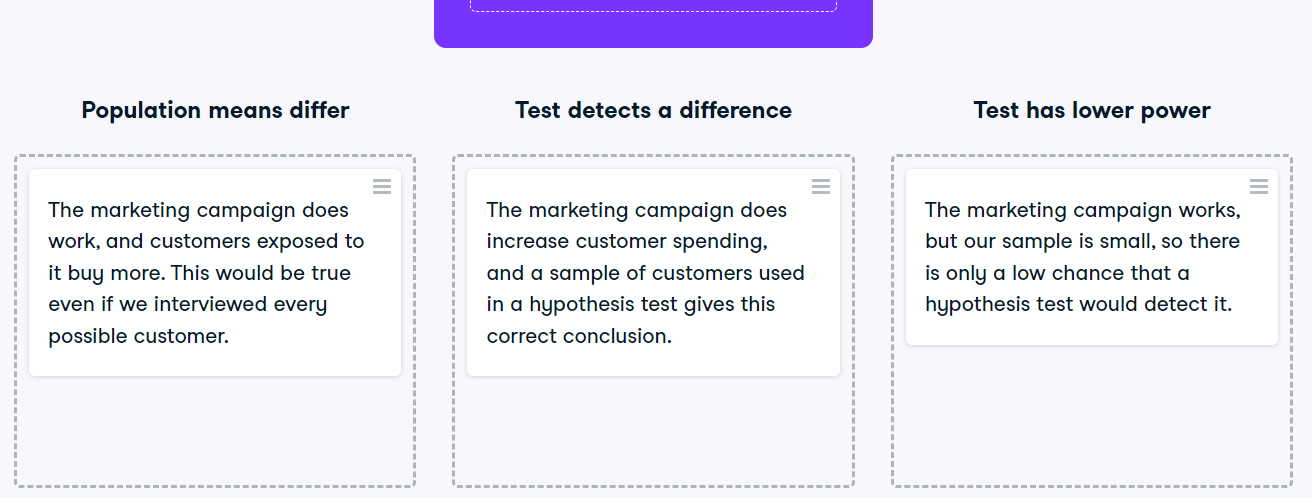

Power for experimental design

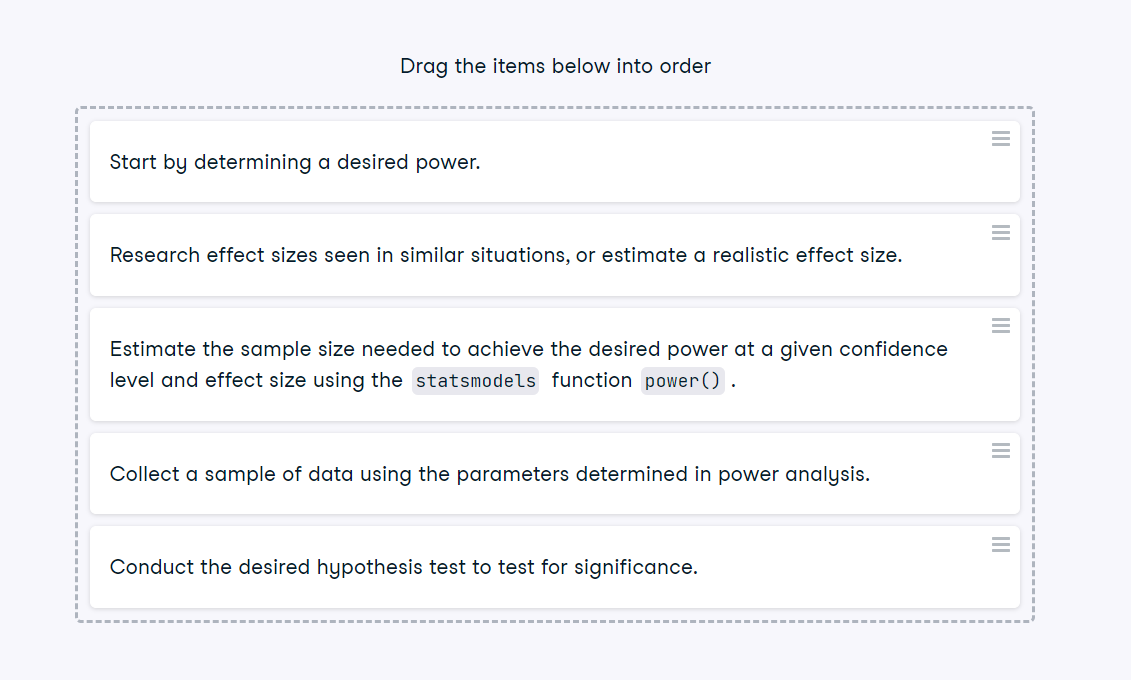

Computing power and sample sizes

In [ ]:
# Compute the ratio of games to advertising companies
games_ads_ratio = games_n / ads_n

# Compute the power of the test
TTestIndPower().power(effect_size=ads_games_cohensd,
                      nobs1=ads_n,
                      alpha=0.05,
                      ratio=games_ads_ratio)

In [ ]:
# Compute the ratio of games to advertising companies
games_ads_ratio = games_n / ads_n

TTestIndPower().power(effect_size=ads_games_cohensd,
                      nobs1=ads_n,
                      alpha=0.05,
                      ratio=games_ads_ratio)

# Solve for the sample size needed to achieve a power of 80%
nobs1 = TTestIndPower().solve_power(effect_size=ads_games_cohensd,
                                    nobs1=None,
                                    alpha=0.05,
                                    power=0.8)

# Print the number of participants needed in one group
print(nobs1)

Bootstrap confidence intervals

In [ ]:
# Compute the daily percent change of each asset
btc_sp_df['Pct_Daily_Change_BTC'] = (btc_sp_df['Open_BTC'] - btc_sp_df['Close_BTC']) / btc_sp_df['Open_BTC']
btc_sp_df['Pct_Daily_Change_SP500'] = (btc_sp_df['Open_SP500'] - btc_sp_df['Close_SP500']) / btc_sp_df['Open_SP500']

# Write a function which returns the correlation coefficient
def pearson_r(x, y):
    return stats.pearsonr(x, y)[0]

# Compute a bootstrap confidence interval
ci = stats.bootstrap((btc_sp_df['Pct_Daily_Change_BTC'], btc_sp_df['Pct_Daily_Change_SP500']),
                     statistic=pearson_r,
                     vectorized=False, paired=True, n_resamples=1000, random_state=1)

print(ci.confidence_interval)

In [ ]:
4

Bootstrapping vs. normality

In [ ]:
# Select just the companies in the Analytics market
analytics_df = investments_df[investments_df['market'] == 'Analytics']

# Confidence interval using the stats.norm function
norm_ci = stats.norm.interval(alpha=0.95,
                             loc=analytics_df['private_equity'].mean(),
                             scale=analytics_df['private_equity'].std() / np.sqrt(analytics_df.shape[0]))

# Construct a bootstrapped confidence interval
bootstrap_ci = stats.bootstrap(data=(analytics_df['private_equity'], ),
                              statistic=np.mean)

print('Normal CI:', norm_ci)
print('Bootstrap CI:', bootstrap_ci.confidence_interval)

In [ ]:
3

In [ ]:
4

Fisher's method in SciPy

In [ ]:
# Compute the combined p-value and the p-value for this test
test_statistic, p_value = stats.combine_pvalues(p_values)

# Print out the p-value for the test
print('Test p-value = ', p_value)

# Print out if the p-value is signifcant at 5%
print(p_value < 0.05)

In [ ]:
3

Inference using Fisher's method

In [ ]:
4

Summarizing Fisher's method

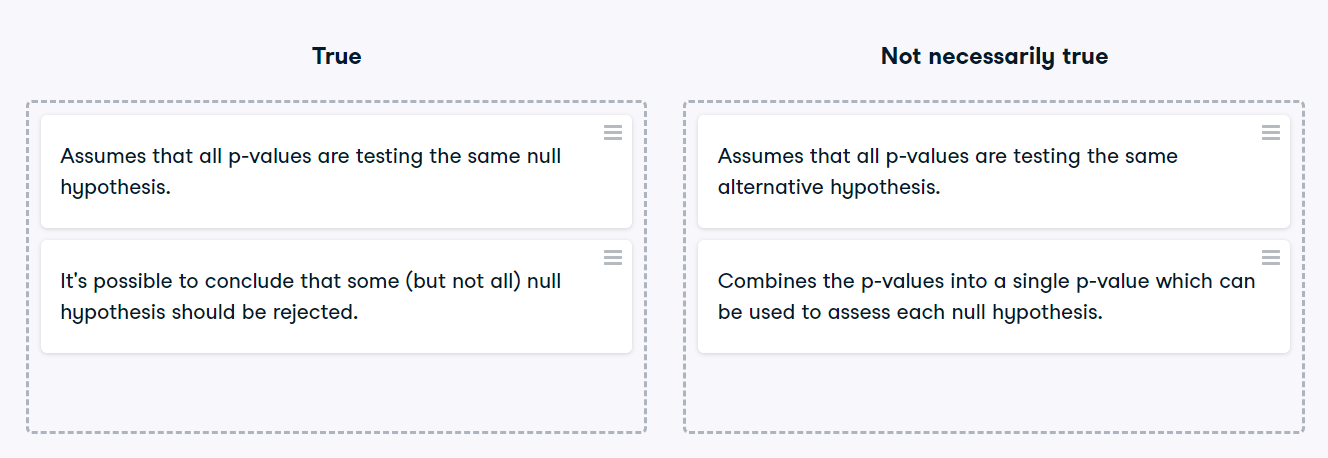

Permutation tests for correlations

In [ ]:
# Define a function which returns the Pearson R value
def statistic(x, y):
	return stats.pearsonr(x, y)[0]

# Define the data as the percent daily change from each asset
data = (btc_sp_df['Pct_Daily_Change_BTC'], btc_sp_df['Pct_Daily_Change_SP500'])

# Compute a permutation test for the percent daily change of each asset
res = stats.permutation_test(data, statistic, n_resamples=1000,
                             vectorized=False, alternative='greater')

# Print if the p-value is significant at 5%
print(res.pvalue < 0.05)

Permutation tests and bootstrapping

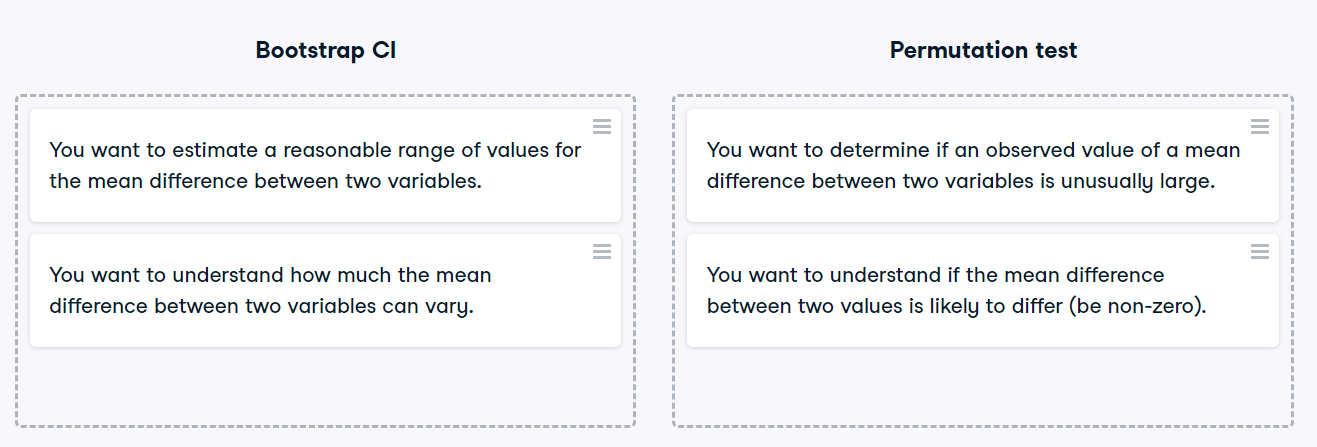

Analyzing skewed data with a permutation test

In [ ]:
# Write a "statistic" function which calculates the difference in means
def statistic(fundings_group_1, fundings_group_2):
  return np.mean(fundings_group_1) - np.mean(fundings_group_2)

# Conduct a permutation test using 100 resamples
perm_result = stats.permutation_test((analytics_df['funding_rounds'], non_analytics_df['funding_rounds']),
                                      statistic=statistic,
                                      n_resamples=100,
                                      vectorized=False)

# Print the p-value
print(perm_result.pvalue)